# Effects of BMI on Insurance Charges of Smokers

@author annice <br>
Texas A&M University <br>
Fall 2021

In this example, we take a look at a dataset that includes insurance charges, bmi, age, sex, number of children, geographic location and smoking status. We first separate them into smokers and non smokers and try to predict insurance charges based on their bmi by fitting a line to the data and minimizing the least squared error using gradient descent.

# On Gradient Descent:
Watch the following video by 3blue1brown on Youtube. Gradient Descent is an optimization algorithm used to find local minima of a differentiable function. By using gradient descent, we iteratively move in the direction of the steepest descent and find the optimal parameters of the model by minimizing the cost function.
<a href="https://www.youtube.com/embed/IHZwWFHWa-w"> If the video doesn't show up, click here!<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></a>

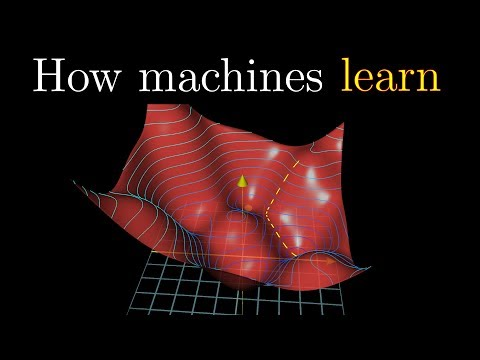

In [219]:
from IPython.display import YouTubeVideo
youtube_video = YouTubeVideo('IHZwWFHWa-w')
display(youtube_video)

In [220]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First read insurance data from file. The data is from <a href="https://www.kaggle.com/mirichoi0218/insurance">Kaggle</a>.

In [221]:
df = pd.read_csv('/content/insurance.csv')

Let's take a look at BMI vs insurance data. 

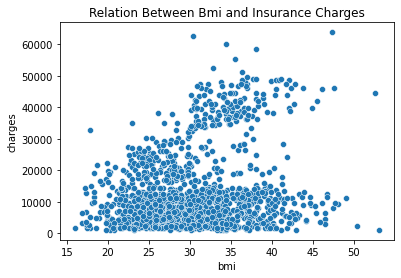

In [222]:
plt.title('Relation Between Bmi and Insurance Charges')
sns.scatterplot(x = df['bmi'], y= df['charges'])
plt.show()

Interesting... it seems like regardless of bmi status a significant number of people are getting charged the same amount of money. What if we separate them by whether they smoke or not.

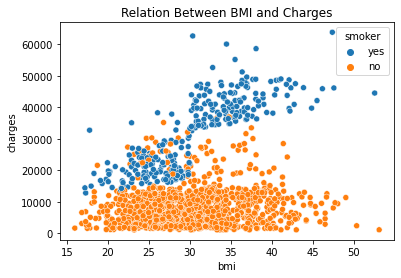

In [223]:
plt.title('Relation Between BMI and Charges')
sns.scatterplot(x = df['bmi'], y= df['charges'] , hue = df['smoker'])

Okay. Clearly for those who smoke, the amount of insurance charges is increasing as their bmi is increasing. So let's get rid of the non-smokers data for now.

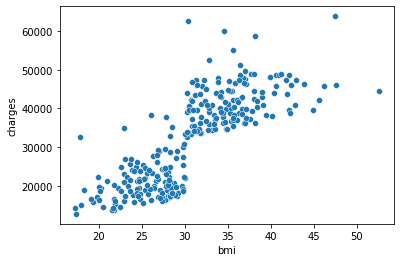

In [224]:
df_smokers = df[df['smoker'].eq('yes')]
sns.scatterplot(x = df_smokers['bmi'], y= df_smokers['charges'])

We can fit a line to the plot. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


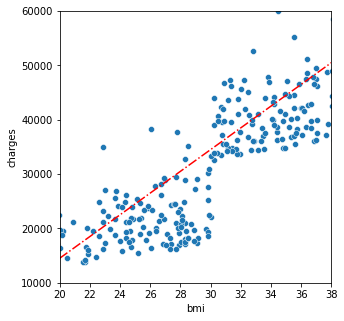

In [225]:
#
fig, ax = plt.subplots(1, 1, figsize=(20,5))
sns.scatterplot(df_smokers['bmi'], df_smokers['charges'],ax=ax)
#Let's set the limit for the x and y axes based on the previous plots. 
x0,x1 = 20, 38
y0,y1 = 10_000, 60_000
ax.set_xlim(x0, x1)
ax.set_ylim(y0, y1)
ax.set_aspect((x1-x0)/(y1-y0))

#Fit a random line to the plot.  
slope=2_000
intercept = -25_500
#so for now we have the fitted line as our model so we can predict insurance charge based on bmi value then try to minimize the mse. 
pred_y0, pred_y1 = (slope*x0 + intercept, slope*x1 + intercept)
ax.plot([x0, x1], [pred_y0, pred_y1], 'r-.', label='Fitted Line')

Let's define a fucntion to calculate the mean squared error. 

In [226]:
'''
function name: calculate_mse
input: receives the dataframe (df), slope and intercept
returns the mse
'''
def calculate_mse(df, slope, intercept):

    bmi, charge = df['bmi'].values, df['charges'].values
    #find the difference between the predicted value and the actual value
    diff = (slope * bmi + intercept) - charge
    #square it and find the average
    mse = np.mean(diff**2) 
    return mse


Let's take a look at what we just did and calculate the MSE using the defined function. 

In [227]:
mse = calc_mean_sq_error(df, slope, intercept)
print(f"The MSE is {mse}")       

The MSE is 745427590.6389842


What if we had used a linear regression model from sklearn? Let's do that and find the minimum MSE

In [228]:
from sklearn.linear_model import LinearRegression
#Initialize a Linear regression model
lin_reg = LinearRegression()
#fit the model to our data
lin_reg.fit(df_smokers['bmi'].values.reshape([-1, 1]), df_smokers['charges'].values)
#extract the slope and intercept from the model
reg_slope, reg_intercept = lin_reg.coef_[0], lin_reg.intercept_
#calculate the mean squared error
min_mse = calc_mean_sq_error(df, reg_slope, reg_intercept)
print(f"The minimum MSE is {min_mse} and the slope and intercept are {reg_slope} and {reg_intercept} respectively")

The minimum MSE is 534252858.3466372 and the slope and intercept are 1473.1062547014208 and -13186.57632276294 respectively


Now that we know what the minimum MSE and the optimal parameters are, it is time to see if we can get closer to the optimal solution using gradient descent or not.

In [229]:
'''
function name: update weights
input: slope(m), intercept(b), dataframe(df) and learning rate
returns new slope and intercept
'''
def update_weights(m, b, df, learning_rate):
    m_prime , b_prime = 0, 0
    N = len(df['bmi'])
    #then we should calculate partial derivatives with respect to the slope and intercept. 
    #Our linear model is y=mx+b where m is the slope and b is the intercept. The mean squared error is obtained from (y-(mx+b))^2/N. So 
    #partial derivative with respect to m will be -2x(y - (mx + b)) and with respect to b will be -2(y - (mx + b))
    for i in df.index.values:
        m_prime += -2*df['bmi'][i] * (df['charges'][i] - (m*df['bmi'][i] + b))
        b_prime += -2*(df['charges'][i] - (m*df['bmi'][i] + b))

    # subtract them from the previous values since the derivatives point in direction of steepest ascent
    m -= (m_prime / N) * learning_rate
    b -= (b_prime / N) * learning_rate

    return m, b

In [230]:
m, b = update_weights(2000, -25_000, df_smokers, 0.01)
print(m)
print(b)

-1101.0626945513227
-25087.33331957372


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The slope found from gradient descent is 1839.05643358416 and the intercept is -24862.381709274185. The MSE is 51916999.59842295


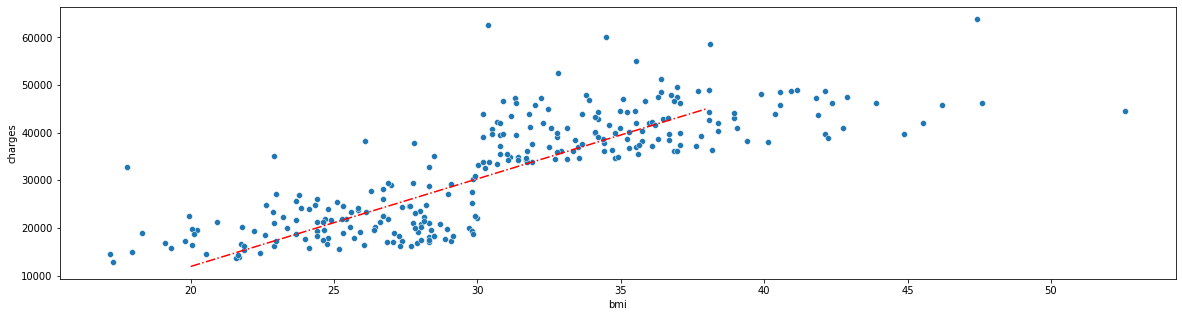

In [231]:
m, b= 2000, -25_000
#let's create a variable to store loss
loss = []
for i in range(0, 150):
  m, b = update_weights(m, b, df_smokers, 0.001)
  mse = calc_mean_sq_error(df_smokers, m, b)  
  loss.append(mse)
  
  #Let's set the limit for the x and y axes based on the previous plots. 
  x0,x1 = 20, 38
  y0,y1 = 10_000, 60_000
  ax.set_xlim(x0, x1)
  ax.set_ylim(y0, y1)
  ax.set_aspect((x1-x0)/(y1-y0))

  slope = m
  intercept = b
  pred_y0, pred_y1 = (slope*x0 + intercept, slope*x1 + intercept)
#Plot the last iteration
fig, ax = plt.subplots(1, 1, figsize=(20,5))
sns.scatterplot(df_smokers['bmi'], df_smokers['charges'],ax=ax) 
ax.plot([x0, x1], [pred_y0, pred_y1], 'r-.', label='Fitted Line')  
print(f"The slope found from gradient descent is {m} and the intercept is {b}. The MSE is {mse}")  

Text(0, 0.5, 'MSE')

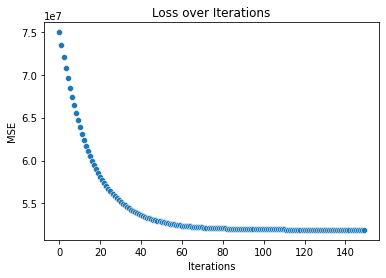

In [232]:
sns.scatterplot(x=range(0, 150), y=loss)
ax = plt.gca()
ax.set_title("Loss over Iterations")
ax.set_xlabel("Iterations")
ax.set_ylabel("MSE")

As you can see in the figure the MSE value gets very close to the optimal value over iterations of gradient descent. 